<a href="https://colab.research.google.com/github/123Rajani/Tipping-agent-Python/blob/main/tipping_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=9501c0800c019d29f5ffaaa37d9ec24b37ff64e7556d5dce6a2987d0cccd2128
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Recommended tip percentage: 19.85%


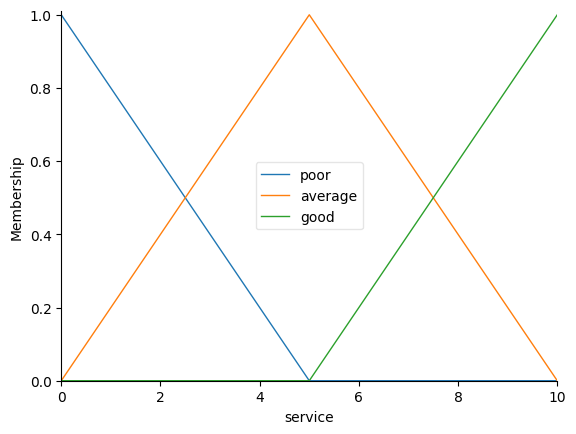

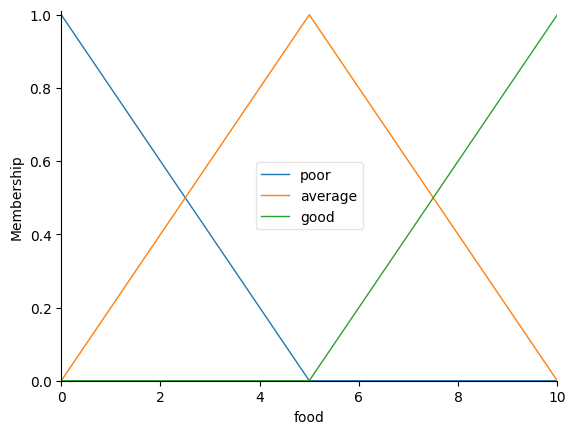

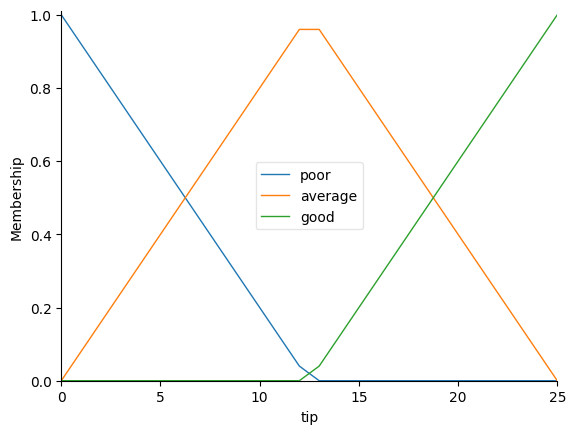

In [1]:
# Install scikit-fuzzy
!pip install -U scikit-fuzzy

# Import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the input variables
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Define the membership functions for the input variables
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Visualize the membership functions (optional)
from skfuzzy import control as ctrl
service_ = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
service_.automf(3)
service_.view()

food_ = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
food_.automf(3)
food_.view()

tip_ = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
tip_.automf(3)
tip_.view()

# Define the fuzzy rules
rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

# Create the fuzzy control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Set the input values
tipping.input['service'] = 9.8
tipping.input['food'] = 6.5

# Evaluate the fuzzy system
tipping.compute()

# Print the output value (the recommended tip percentage)
print(f"Recommended tip percentage: {tipping.output['tip']:.2f}%")